In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from chart_studio import plotly
#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split

In [3]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data.head(5)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   
2           ca            mrs          grades_prek_2   
3           ga            mrs          grades_prek_2   
4           wa            mrs             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                 clean_subcategories  \
0       math_science  appliedsciences health_lifescience   
1       specialneeds                        specialneeds   
2  literacy_language                            literacy   
3    appliedlearning                    earlydevelopment   
4  literacy_language                            literacy   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05  
1  imagine 8 9 years old you third grade classroo...  213.03  
2  having class 24 students comes diverse learner...  329.00  
3  i recently read article giving students choice...  481.04  
4  my students crave challenge eat obstacles brea...   17.74

In [4]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\i520085\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<font color='red'><b>We are using Textblob for sentiment analysis</b></font>

In [6]:
from textblob import TextBlob
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
def getPolarity(review):
        return TextBlob(review).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [7]:
data['Polarity'] = data['essay'].apply(getPolarity)
data['Analysis'] = data['Polarity'].apply(analysis)
data.head(2)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     math_science  appliedsciences health_lifescience   
1     specialneeds                        specialneeds   

                                               essay   price  Polarity  \
0  i fortunate enough use fairy tale stem kits cl...  725.05  0.323506   
1  imagine 8 9 years old you third grade classroo...  213.03  0.293008   

   Analysis  
0  Positive  
1  Positive

In [8]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                            53     math_science   

                  clean_subcategories  \
0  appliedsciences health_lifescience   

                                               essay   price  Polarity  \
0  i fortunate enough use fairy tale stem kits cl...  725.05  0.323506   

   Analysis  
0  Positive

In [9]:
features = []

In [10]:
data.head(2)

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     math_science  appliedsciences health_lifescience   
1     specialneeds                        specialneeds   

                                               essay   price  Polarity  \
0  i fortunate enough use fairy tale stem kits cl...  725.05  0.323506   
1  imagine 8 9 years old you third grade classroo...  213.03  0.293008   

   Analysis  
0  Positive  
1  Positive

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [12]:
print(X_train.columns)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'Polarity', 'Analysis'],
      dtype='object')


<font color='Red'><b> Vectorizing Data </b></font>

In [13]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizerTfIDF = TfidfVectorizer(min_df=10)

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizerTfIDF.fit_transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizerTfIDF.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizerTfIDF.transform(X_test['essay'].values)

#print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(49041, 10) (49041,)
(24155, 10) (24155,)
(36052, 10) (36052,)
After vectorizations
(49041, 12174) (49041,)
(24155, 12174) (24155,)
(36052, 12174) (36052,)


In [14]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [15]:
def tf_idf_done(word_list):
    train_title_tfidf_w2v_vectors = []; 
    for sentence in tqdm(word_list): 
        vector = np.zeros(300) 
        tf_idf_weight =0; 
        for word in sentence.split():
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word]
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
                vector += (vec * tf_idf) 
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        train_title_tfidf_w2v_vectors.append(vector)
    print(len(train_title_tfidf_w2v_vectors))
    print(len(train_title_tfidf_w2v_vectors[0]))
    return train_title_tfidf_w2v_vectors

In [16]:
X_train_essay_w2v_vectors=tf_idf_done(X_train['essay'].values)
X_cv_essay_w2v_vectors=tf_idf_done(X_cv['essay'].values)
X_test_essay_w2v_vectors=tf_idf_done(X_test['essay'].values)

  1%|▋                                                                            | 197/24155 [00:00<00:50, 470.74it/s]

49041
300


  0%|▎                                                                            | 142/36052 [00:00<01:21, 440.89it/s]

24155
300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:23<00:00, 430.67it/s]

36052
300


In [17]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
X_train_clean_cat = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat.shape, y_train.shape)
print(X_cv_clean_cat.shape, y_cv.shape)
print(X_test_clean_cat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#features.extend(vectorizer.get_feature_names())

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [18]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
#print(X_cv_state_ohe.head(5))
print("="*100)

features.extend(vectorizer.get_feature_names())

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [19]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_sub_cat = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_sub_cat = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_sub_cat = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_sub_cat.shape, y_train.shape)
print(X_cv_clean_sub_cat.shape, y_cv.shape)
print(X_test_clean_sub_cat.shape, y_test.shape)

#features.extend(vectorizer.get_feature_names())

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)


In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) 

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#features.extend(vectorizer.get_feature_names())

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [21]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) 

X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#features.extend(vectorizer.get_feature_names())

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [22]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
print(X_train['price'].head(5))
normalizer.fit(X_train['price'].values.reshape(-1,1))
print(X_train['price'].head(5))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

#features.extend(X_train['price'])

65592     243.99
105206    124.98
95        276.50
106209    368.95
101834    399.46
Name: price, dtype: float64
65592     243.99
105206    124.98
95        276.50
106209    368.95
101834    399.46
Name: price, dtype: float64
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) 
print(X_train['project_grade_category'].head(5))

X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#features.extend(vectorizer.get_feature_names())

65592     grades_prek_2
105206    grades_prek_2
95        grades_prek_2
106209    grades_prek_2
101834    grades_prek_2
Name: project_grade_category, dtype: object
After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [24]:
normalizer = Normalizer()
print(X_train['teacher_number_of_previously_posted_projects'].head(5))
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(X_train['teacher_number_of_previously_posted_projects'].head(5))

X_train_tnpp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_tnpp_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnpp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnpp_norm.shape, y_train.shape)
print(X_cv_tnpp_norm.shape, y_cv.shape)
print(X_test_tnpp_norm.shape, y_test.shape)
print("="*100)

#features.extend(X_train['teacher_number_of_previously_posted_projects'])

65592      0
105206    57
95         0
106209     0
101834     8
Name: teacher_number_of_previously_posted_projects, dtype: int64
65592      0
105206    57
95         0
106209     0
101834     8
Name: teacher_number_of_previously_posted_projects, dtype: int64
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [25]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
print(X_train['Polarity'].head(5))
normalizer.fit(X_train['Polarity'].values.reshape(-1,1))
print(X_train['Polarity'].head(5))

X_train_polarity_norm = normalizer.transform(X_train['Polarity'].values.reshape(-1,1))
X_cv_polarity_norm = normalizer.transform(X_cv['Polarity'].values.reshape(-1,1))
X_test_polarity_norm = normalizer.transform(X_test['Polarity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_polarity_norm.shape, y_train.shape)
print(X_cv_polarity_norm.shape, y_cv.shape)
print(X_test_polarity_norm.shape, y_test.shape)
print("="*100)

#features.extend(X_train['price'])

65592     0.220397
105206    0.227357
95        0.234143
106209    0.216359
101834    0.245799
Name: Polarity, dtype: float64
65592     0.220397
105206    0.227357
95        0.234143
106209    0.216359
101834    0.245799
Name: Polarity, dtype: float64
After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Analysis'].values) 

X_train_Analysis_cat = vectorizer.transform(X_train['Analysis'].values)
X_cv_Analysis_cat = vectorizer.transform(X_cv['Analysis'].values)
X_test_Analysis_cat = vectorizer.transform(X_test['Analysis'].values)

print("After vectorizations")
print(X_train_Analysis_cat.shape, y_train.shape)
print(X_cv_Analysis_cat.shape, y_cv.shape)
print(X_test_Analysis_cat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#features.extend(vectorizer.get_feature_names())

After vectorizations
(49041, 3) (49041,)
(24155, 3) (24155,)
(36052, 3) (36052,)
['negative', 'neutral', 'positive']


<font color='red'><b> Stacking for both set1 and set2 </b></font>

In [27]:
from scipy.sparse import hstack
X_tr_w2v = hstack((X_train_essay_w2v_vectors, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnpp_norm, X_train_clean_cat, X_train_clean_sub_cat,X_train_polarity_norm,X_train_Analysis_cat)).tocsr()
X_cr_w2v = hstack((X_cv_essay_w2v_vectors, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_tnpp_norm, X_cv_clean_cat, X_cv_clean_sub_cat,X_cv_polarity_norm,X_cv_Analysis_cat)).tocsr()
X_te_w2v = hstack((X_test_essay_w2v_vectors, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_tnpp_norm, X_test_clean_cat, X_test_clean_sub_cat,X_test_polarity_norm,X_test_Analysis_cat)).tocsr()

print("Final Data matrix")
print(X_tr_w2v.shape, y_train.shape)
print(X_cr_w2v.shape, y_cv.shape)
print(X_te_w2v.shape, y_test.shape)
print("="*100)

features.extend(vectorizer.get_feature_names())

Final Data matrix
(49041, 405) (49041,)
(24155, 405) (24155,)
(36052, 405) (36052,)


In [28]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnpp_norm, X_train_clean_cat, X_train_clean_sub_cat,X_train_polarity_norm,X_train_Analysis_cat)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_tnpp_norm, X_cv_clean_cat, X_cv_clean_sub_cat,X_cv_polarity_norm,X_cv_Analysis_cat)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_tnpp_norm, X_test_clean_cat, X_test_clean_sub_cat,X_test_polarity_norm,X_test_Analysis_cat)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

features.extend(vectorizer.get_feature_names())

Final Data matrix
(49041, 12279) (49041,)
(24155, 12279) (24155,)
(36052, 12279) (36052,)


In [29]:
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se2 = clf2.fit(X_tr_tfidf, y_train)

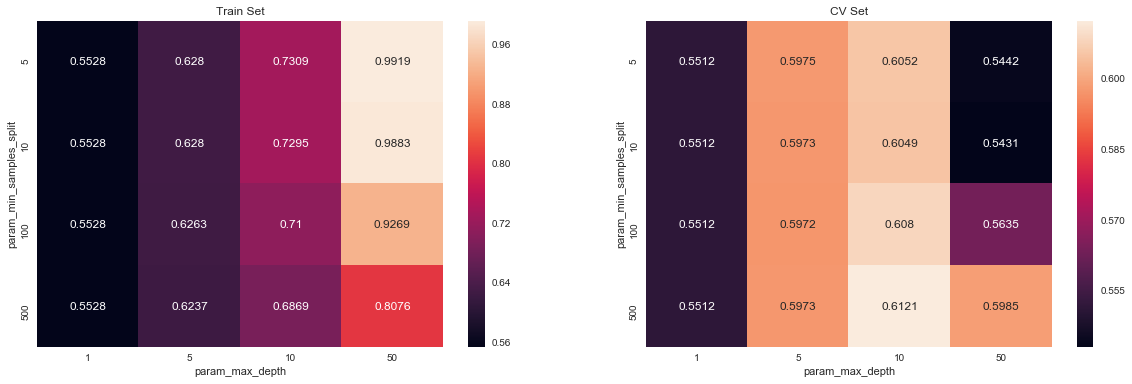

In [30]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [31]:
print(clf2.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf2.score(X_tr_tfidf,y_train))
print(clf2.score(X_te_tfidf,y_test))

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)
0.684355629798618
0.6161133263085257


In [32]:
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] }]

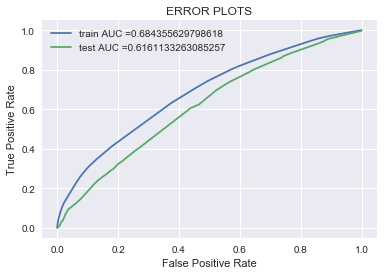

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf11.fit(X_tr_tfidf, y_train)
clfV1.fit(X_tr_tfidf, y_train)
y_train_pred1 = clf11.predict_proba(X_tr_tfidf) [:,1]
y_test_pred1 = clf11.predict_proba(X_te_tfidf) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [34]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

In [35]:
# function to collect fpr
def collect_fpr(y_test, predictions):
    fpr = []
    for i in range(len(y_test)):
        if(y_test[i] == 0 and predictions[i]==1):
            fpr.append(i)
    return fpr

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.53
the maximum value of tpr*(1-fpr) 0.34 for threshold 0.49


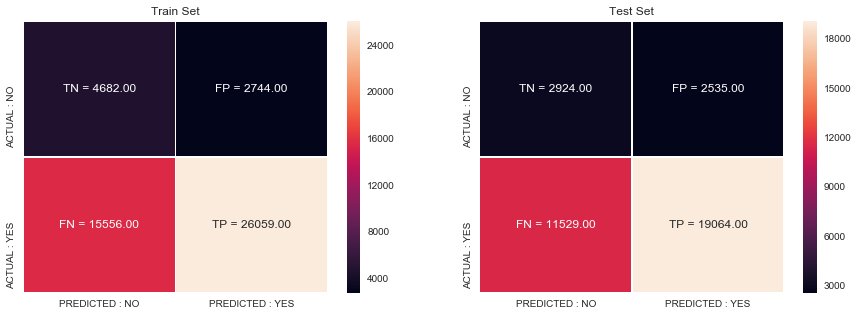

In [36]:
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [37]:
y_test_list = list(y_test[::])
len(y_test_list)

36052

In [38]:
fpi = []
for i in range(len(y_test)) :
    if (y_test_list[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
fp_price = []
fp_tnpp = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])
    fp_price.append(X_test['price'].values[i])
    fp_tnpp.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

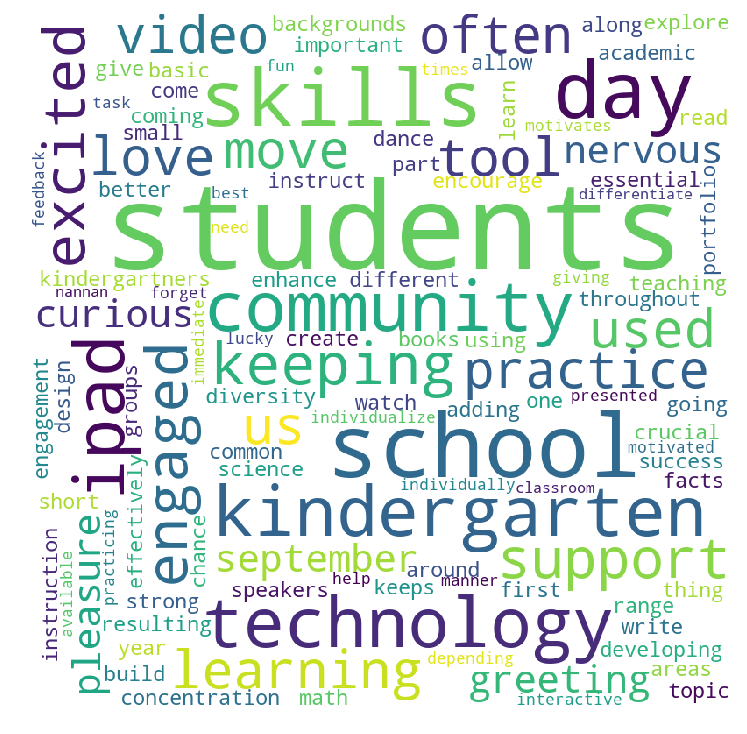

In [39]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

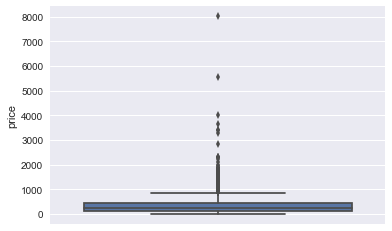

In [66]:
df1 = pd.DataFrame({'price':fp_price})
sns.boxplot(y='price', data=df1)

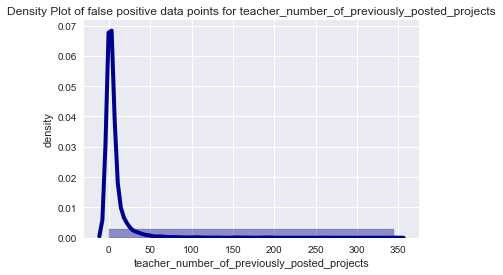

In [71]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(fp_tnpp, hist=True, kde=True, 
             bins=1, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Density Plot of false positive data points for teacher_number_of_previously_posted_projects') 
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('density')
plt.show()


In [40]:
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se2 = clf2.fit(X_tr_w2v, y_train)

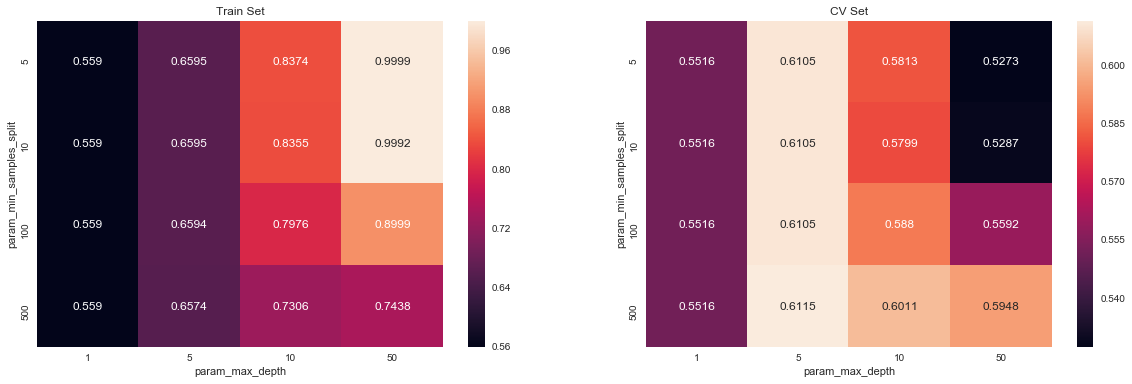

In [41]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [42]:
print(clf2.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf2.score(X_tr_w2v,y_train))
print(clf2.score(X_te_w2v,y_test))

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=500)
0.6544014507965636
0.6109945016917147


In [43]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] }]

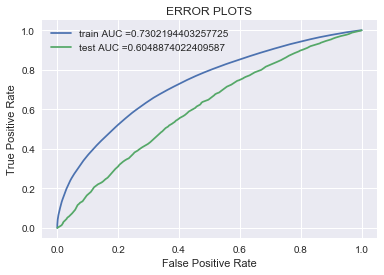

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf11.fit(X_tr_w2v, y_train)
clfV1.fit(X_tr_w2v, y_train)
y_train_pred1 = clf11.predict_proba(X_tr_w2v) [:,1]
y_test_pred1 = clf11.predict_proba(X_te_w2v) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [45]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.45 for threshold 0.45
the maximum value of tpr*(1-fpr) 0.33 for threshold 0.53


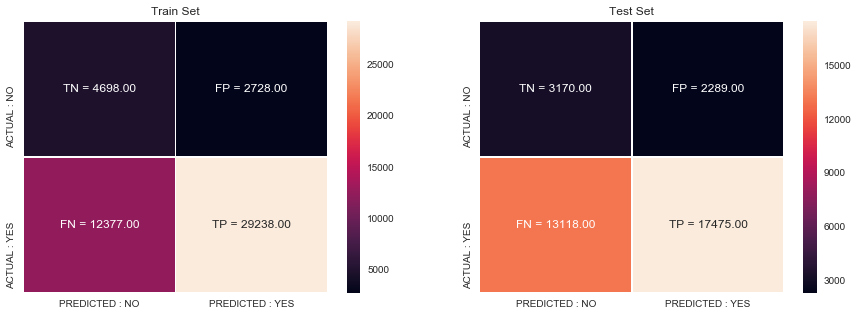

In [46]:
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [47]:
y_test_list = list(y_test[::])
len(y_test_list)

36052

In [74]:
fpi = []
for i in range(len(y_test)) :
    if (y_test_list[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
fp_price1 = []
fp_tnpp1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])
    fp_price1.append(X_test['price'].values[i])
    fp_tnpp1.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

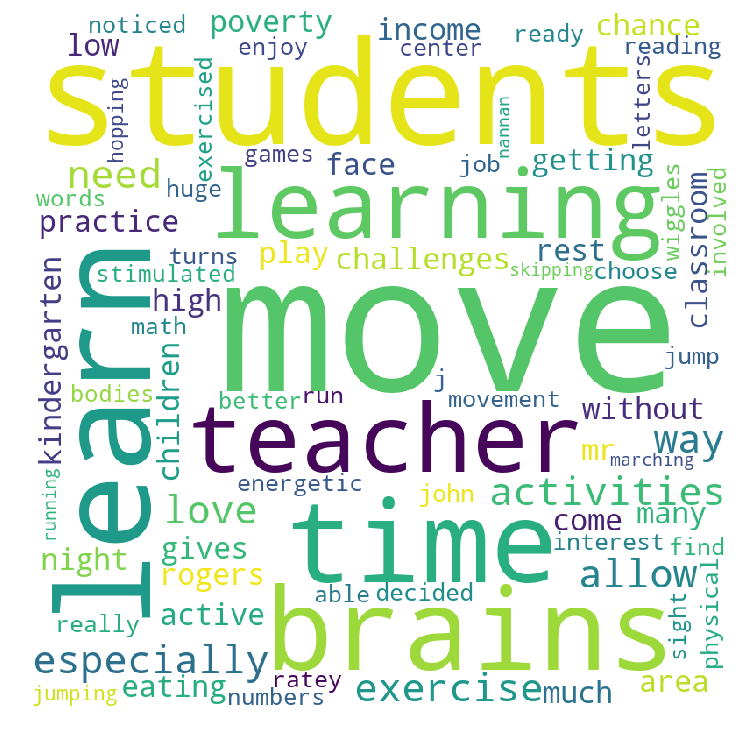

In [49]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

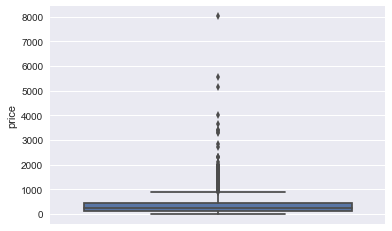

In [73]:
df1 = pd.DataFrame({'price':fp_price1})
sns.boxplot(y='price', data=df1)

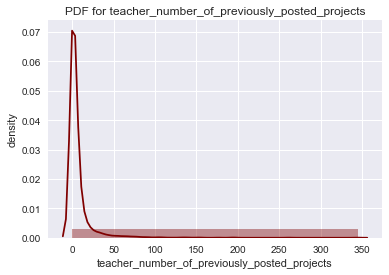

In [81]:
sns.distplot(fp_tnpp1, hist=True, kde=True, 
             bins=1, color = 'maroon')

plt.title('PDF for teacher_number_of_previously_posted_projects') 
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('density')
plt.show()


<font color='red'><b>Feature Importance Calculation</b></font>

In [51]:
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'min_samples_split': [5, 10, 100, 500]}
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se2 = clf2.fit(X_tr_tfidf, y_train)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
    X[:,model.best_estimator_.feature_importances_ != 0]
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [53]:
X_set5_train = selectKImportance(clf2, X_tr_tfidf)
X_set5_test = selectKImportance(clf2, X_te_tfidf)

print(X_set5_train.shape)
print(X_set5_test.shape)

(49041, 5)
(36052, 5)


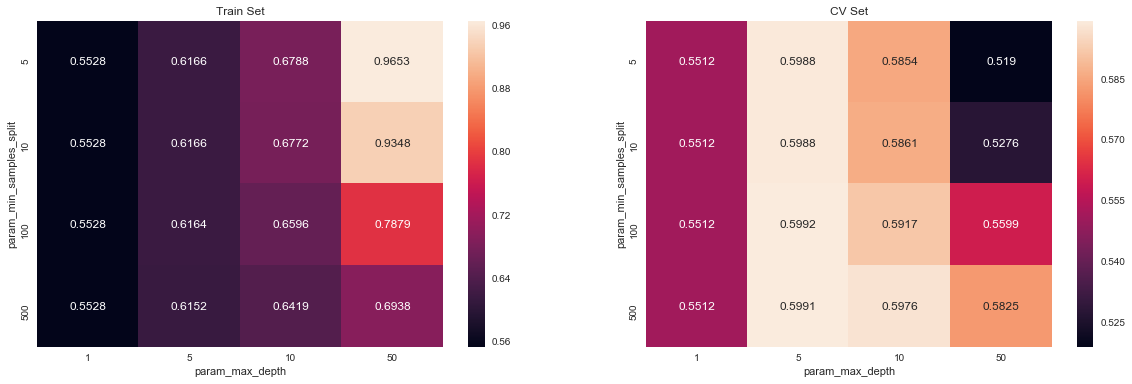

In [54]:

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt5= DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf5 = GridSearchCV(dt5, parameters, cv=3, scoring='roc_auc',return_train_score=True)
set5= clf5.fit(X_set5_train, y_train)


import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf5.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [55]:

print(clf5.best_estimator_)
print(clf5.score(X_set5_train,y_train))
print(clf5.score(X_set5_test,y_test))

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=100)
0.6144566733797581
0.5972722778690956


In [56]:
best_tune_parameters=[{'max_depth': [10], 'min_samples_split':[500] } ]

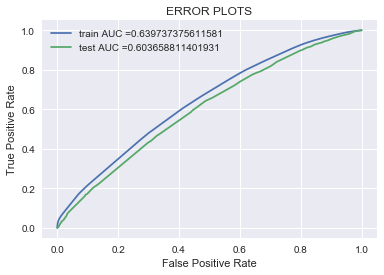

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf11.fit(X_set5_train, y_train)
clfV1.fit(X_set5_train, y_train)
y_train_pred1 = clf11.predict_proba(X_set5_train) [:,1]
y_test_pred1 = clf11.predict_proba(X_set5_test) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

the maximum value of tpr*(1-fpr) 0.36 for threshold 0.53
the maximum value of tpr*(1-fpr) 0.33 for threshold 0.53


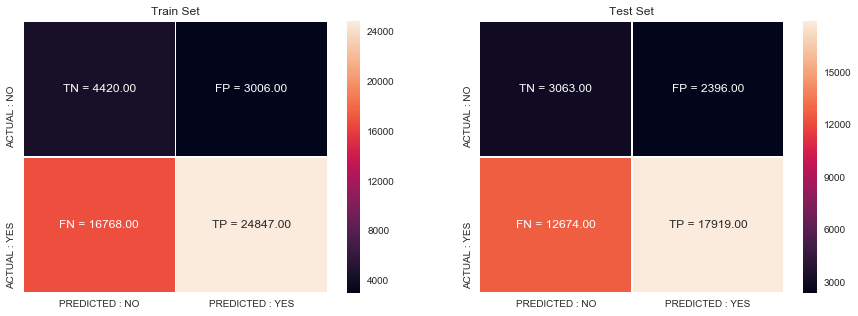

In [58]:
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),
con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [59]:
y_test_list = list(y_test[::])
len(y_test_list)

36052

In [60]:
fpi = []
for i in range(len(y_test)) :
    if (y_test_list[i] == 0) & (predictions1[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

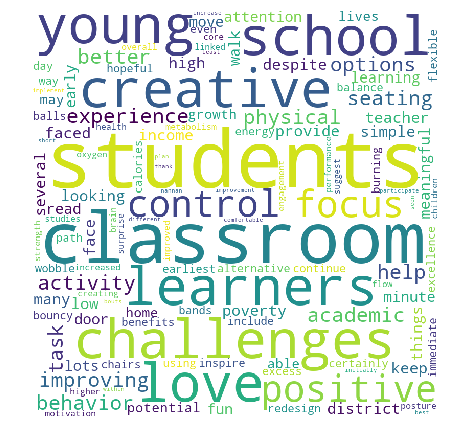

In [61]:
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [95]:
tb = PrettyTable()
tb.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split ","Train-Score"," Test-score ")
tb.add_row([" Tf-Idf", 10 , 500 ,68.4 ,61.6 ])
tb.add_row([" TFIDF-W2V", 10 , 500 , 73, 60.5 ])
tb.add_row(["Top 5000 Features", 10, 500 ,63.9, 60.5 ])
print(tb.get_string(title = "Observations"))

+-----------------------------------------------------------------------------------+
|                                    Observations                                   |
+-------------------+-------------+--------------------+-------------+--------------+
|     Vectorizer    |  Max_depth  |  Min_sample_split  | Train-Score |  Test-score  |
+-------------------+-------------+--------------------+-------------+--------------+
|       Tf-Idf      |      10     |        500         |     68.4    |     61.6     |
|      TFIDF-W2V    |      10     |        500         |      73     |     60.5     |
| Top 5000 Features |      10     |        500         |     63.9    |     60.5     |
+-------------------+-------------+--------------------+-------------+--------------+
